In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
from os import listdir
%matplotlib inline
import csv
#import seaborn as sns
from pptx import Presentation
from pptx.util import Inches 
#import csv
prs = Presentation()
import glob

location = r'C:\Users\sbharadwaj\Desktop\JMP scripts\ICM40605 FT1 CMOS trim code'
df = pd.read_csv(location+'\\'+ 'GyroSenseGap.csv')
#df = df[(df['CHECK GXDRIVESENSESEP'] >= 800) & (df['CHECK GXDRIVESENSESEP'] <= 3000)]
#df = df[(df['CHECK GYDRIVESENSESEP'] >= 800) & (df['CHECK GYDRIVESENSESEP'] <= 3000)]
#df = df[(df['CHECK GZDRIVESENSESEP'] >= 800) & (df['CHECK GZDRIVESENSESEP'] <= 3000)]
#df = (x.loc[x['CHECK GXDRIVESENSESEP'] > 800) & (x.loc[x['CHECK GXDRIVESENSESEP'] < 3000)
df = df.loc[df['VERDICT']=='PASS']
print(df)
global df

      CMOS_Lot-Wafer        LotID  WaferID  CHECK DIEID  \
0          G2FM24-01  G2FM24-C1.1        1         5310   
1          G2FM24-01  G2FM24-C1.1        1         7979   
3          G2FM24-01  G2FM24-C1.1        1         6168   
4          G2FM24-01  G2FM24-C1.1        1         4774   
5          G2FM24-01  G2FM24-C1.1        1        11684   
6          G2FM24-01  G2FM24-C1.1        1         4752   
7          G2FM24-01  G2FM24-C1.1        1         5575   
9          G2FM24-01  G2FM24-C1.1        1          673   
10         G2FM24-01  G2FM24-C1.1        1         5013   
11         G2FM24-01  G2FM24-C1.1        1         3008   
12         G2FM24-01  G2FM24-C1.1        1         1809   
13         G2FM24-01  G2FM24-C1.1        1         4535   
14         G2FM24-01  G2FM24-C1.1        1         8894   
15         G2FM24-01  G2FM24-C1.1        1         7735   
16         G2FM24-01  G2FM24-C1.1        1         4249   
18         G2FM24-01  G2FM24-C1.1        1         2610 

In [3]:
#parameters = ['CHECK GY_SC2V_FT_TRIM_D2A_SM_CODE','CHECK GYRO_X_MEMS_OFF_HFS_CODE','CHECK DVDDCODE','CHECK GX_SC2V_FT_TRIM_D2A_SM_CODE','CHECK AY_CC_TRIM_CODE','CHECK GYRO_Y_MEMS_OFF_HFS_CODE','CHECK DVDDCODE','CHECK ACCEL_AREG_TRIM_D2A_CODE','CHECK ACCEL_Z_GAIN_LFS_CODE','CHECK AX_CC_TRIM_CODE','CHECK AY_CC_TRIM_CODE','CHECK AY_SC2V_CODE','CHECK AZ_CC_TRIM_CODE','CHECK AZ_FT_SM_CODE','CHECK AZ_SC2V_CODE','CHECK DREG_VREF_TRIM_CODE','CHECK DVDDCODE','CHECK GX_SC2V_SOC_TRIM_D2A_CODE_1','CHECK GXFEEDTHROUGH','CHECK GXQUADRATURELSB','CHECK GY_DMD_PHASE_TRIM_D2D_CODE','CHECK GY_DMD_PHASE_TRIM_D2D_CODE_1','CHECK GY_SC2V_FT_TRIM_D2A_SM_CODE','CHECK GY_SC2V_SOC_TRIM_D2A_CODE_1','CHECK GYFEEDTHROUGH','CHECK GYQUADRATURELSB','CHECK GYRO_AVDDCODE','CHECK GYRO_BIAS_AREG_CP25V_TRIM_D2A_CODE','CHECK GYRO_BIAS_BG_TRIM_D2A_CODE','CHECK GYRO_DRV_AGC_AMP_TRIM_D2A_CODE','CHECK GYRO_DRV_XST_MODE_D2A_CODE','CHECK GYRO_X_MEMS_OFF_HFS_CODE','CHECK GYRO_X_MEMS_OFF_HFS_CODE_2','CHECK GYRO_X_MEMS_OFF_LFS_CODE','CHECK GYRO_X_MEMS_OFFTCA_2C_CODE','CHECK GYRO_X_MEMS_OFFTCA_2C_CODE_1','CHECK GYRO_Y_MEMS_OFF_HFS_CODE','CHECK GYRO_Y_MEMS_OFF_LFS_CODE','CHECK GYRO_Y_MEMS_OFFTCA_2C_CODE_1','CHECK GYRO_Y_MEMS_OFFTCA_2C_CODE_1','CHECK GYRO_Z_GAIN_HFS_CODE','CHECK GYRO_Z_MEMS_OFF_HFS_CODE','CHECK GYRO_Z_MEMS_OFFTCA_2C_CODE_1','CHECK GZ_DMD_PHASE_TRIM_D2D_CODE_1','CHECK GZ_SC2V_FT_TRIM_D2A_SM_CODE','CHECK GZ_SC2V_SOC_TRIM_D2A_CODE_1','CHECK GZFEEDTHROUGH','CHECK GZQUADRATURELSB','CHECK INTOSCCODE','CHECK MINIBG_CTAT_TRIM_D2A_2C_CODE','CHECK MINIBG_PTAT_TRIM_D2A_CODE','CHECK MINIBGCODE','CHECK PLLDIVCODE','CHECK RCOSC_AREG_TRIM_D2A_CODE','CHECK RCOSC_R_TRIM_D2A_CODE','CHECK TMP_AREG_TRIM_CODE','CHECK WUOSC_FREQ_TRIM_D2A_CODE','CHECK XG_ST_DATA_CODE','CHECK YG_ST_DATA_CODE','CHECK ZG_ST_DATA_CODE']
parameters = ['CHECK GXSENSEGAPDERIVED','CHECK GYSENSEGAPDERIVED','CHECK GZSENSEGAPDERIVED']
#print('Parameter'+\t+ 'mean'+\t+'Std Dev')
print('param','Mean','Std Dev',' + 5Sig' ,'- 5Sig','Min','Max','Cpk')
for param in parameters:
    plus_5Sig = df[param].mean()+(5*df[param].std())
    minus_5Sig = df[param].mean()-(5*df[param].std())
    CpU = (plus_5Sig-df[param].mean())/(3*df[param].std())
    CpL = (df[param].mean()-minus_5Sig)/(3*df[param].std())
    cpk = min(CpU,CpL)
    try:
        print(param,df[param].mean(),df[param].std(),plus_5Sig,minus_5Sig,df[param].min(),df[param].max(),cpk)
    except:
        continue
        #print (param+' Is not found in dataSet')
    #print(df[param].describe())


param Mean Std Dev  + 5Sig - 5Sig Min Max Cpk
CHECK GXSENSEGAPDERIVED 1.87239497659 0.0206897672777 1.97584381298 1.7689461402 1.7975 1.9612 1.66666666667
CHECK GYSENSEGAPDERIVED 1.80047159099 0.0226547184276 1.91374518313 1.68719799886 1.7191 1.894 1.66666666667
CHECK GZSENSEGAPDERIVED 1.68782508732 0.0395050099648 1.88535013714 1.49030003749 1.546 1.8242 1.66666666667


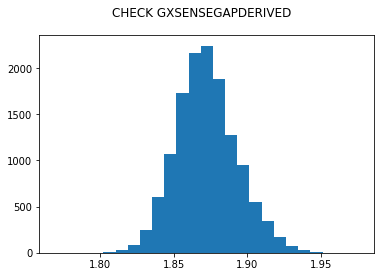

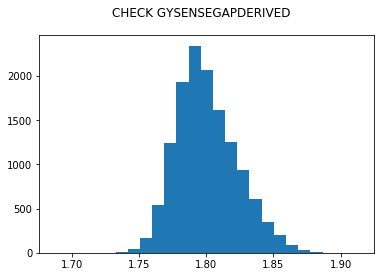

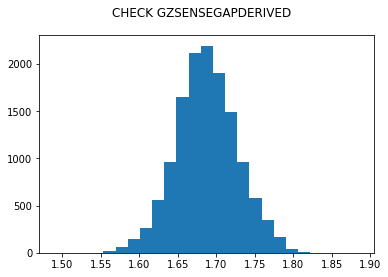

In [35]:
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=top=Inches(1)
for param in parameters:
    plus_5Sig = df[param].mean()+(5*df[param].std())
    minus_5Sig = df[param].mean()-(5*df[param].std())
    plus_3Sig = df[param].mean()+(3*df[param].std())
    minus_3Sig = df[param].mean()-(3*df[param].std())
    
    #df.hist(param, bins=25)#, xlim = (1,10))
    #print(type(minus_5Sig))
    #df.hist(param)#,range = [plus_5Sig,minus_5Sig] )
    #plt.figure(param)
    #print(type(param))
    x = df[param].dropna(axis=0, how ='any' )
    #print (param)
    try:
        
        plt.hist(x, bins = 25, range = (minus_5Sig,plus_5Sig))
        #plt.hist(x, bins = 25, range = (800,3000))
        plt.suptitle(param)
        plt.legend()
        plt.show()
        #plt.savefig( location+'\\plots\\'+param+'.png')
        #global Curr_file
        pic = slide.shapes.add_picture(plt.show(),left,top)
        #plt.savefig(Curr_file)
        plt.clf()
    except:
        #print ('"'+param+'"'+' Is not found in dataSet')
        continue
prs.save('HelloWorld.pptx')     

In [26]:
from pptx import Presentation
from pptx.util import Inches 
#import csv
prs = Presentation()

title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]


title.text = "Hello World"
subtitle.text = "Lets do this in Python!"

#*******************************************************************
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)
#img = 'helloWorld codefile.png'

left=top=Inches(1)
pic = slide.shapes.add_picture(Curr_file,left,top)

prs.save('HelloWorld.pptx')



NameError: name 'Curr_file' is not defined

In [30]:
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)
img = 'helloWorld codefile.png'

left=top=Inches(1)
pic = slide.shapes.add_picture(img,left,top)

prs.save('HelloWorld.pptx')